In [6]:
import csv
from game import RPSgame
from markovModel import MarkovModel
import matplotlib.pyplot as plt

In [30]:
dict = {1:"R", 2:"S", 3:"P"}

decay = [i/100 for i in range(50,100)]
results = []

In [31]:
my_inputs = []
with open('../../data/collected.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)

    next(reader)

    for row in reader:
        s = row[2]
        res = ''.join([dict[int(i)] for i in s])
        my_inputs.append(res)

In [32]:
big_string = ''.join(my_inputs)

batches=[]
for i in range((len(big_string)//100)+1):
    batches.append(big_string[i*100:(i+1)*100])

In [33]:
batches

['PSSSSSSRRPSSRPSSSSRRRRPPSSSRRRRRPPSSSSSSSRRPRSPPSSSRRRRPPSRRPSSRPSSSRRPSRPSRPPPSRPPSRRRPPPSSSSSRRPSS',
 'SPSSRPSSPSRRSRPSPPPSRSRRSRPRRSRSSRRSRPSSPRPSPRPSPRPSPRPSPRSRSPSPRSRPRRSRPRRSSSPRRSRPSRPPPSPPRRSRPSRS',
 'RRPRSPRRRPSPSSRPSPRPSPPRRPPPPPSPRPSRSSRPSPRPPPSPRRSSPRRSSRRSPSRSRRSRRPSPRPPPSSPPSPPRRSRRPSPPSSSPSSSS',
 'SPSPRRSPRSSRRRSRPSPSPPPRPRRPSPPRRPSPRRRRRRRPSRRPRPPSRSPPSPRSSRRPPSRRSPSPSRRSPPSRSPPSSRSPRSPSPRSPPRSP',
 'PSRPPRSPSPPSPPRSPRSPRPSRSPRSPPSPRRSPPRRRRSSPPPSPRRSPRRRRPRRRPPSRRRPRSSPRRPSSRRRPPSSRRRPPPRSPPRPRSSPR',
 'PPSRPPPPPSRSSRRRRRRPSPRPSPPSRSPSRRPSRRSPPSRRSPRSPRSPRSPRSPRSPPSRRSPSRPSSSSRSPPSRSRPRSPSRRRRRRRRSSSSS',
 'SPPPPPRSPRSPSPRRPSPSRSPRRRSPPSSRRRSSSPPPPSSRRSRSRRRSPSRSRPPPPPPPSRPSRSPPPSPRRRSPSRSPSRSPPSRSPPRSRSPS',
 'PPRPRRSRPSRPSSPRSRPSPSRRRPPSRRPSSRSPSSSPPRSPSPPRRRPSRRRPSRSPSPPPSSRPSRRRPPSRSPSRPSRRRPSPPPSPSRPSRPSR',
 'PSSPRSPSRSPPRSPPPSRPSPRRSRRPSPRSPPPSRPRRRSPSRPPSSSRSPSSPRSPRPSPPRSRPPPSSRRRPSRSSSSRPSRPPPSSRRRRSPRRS',
 'RPSRSPPRSSSRRSPPSRRRRRPSPSPPSRRSPRRPPSSSPRRSPPRSRSRPS

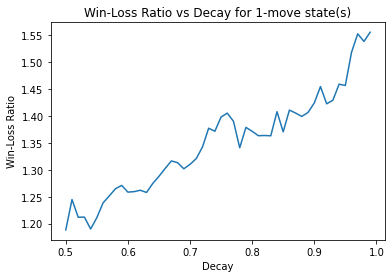

0.99


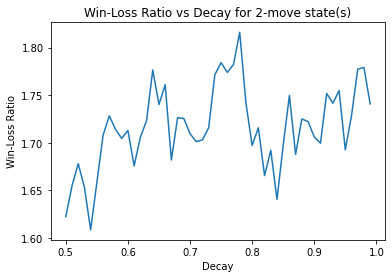

0.78


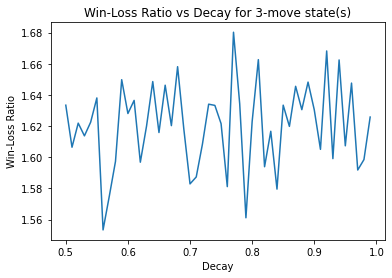

0.77


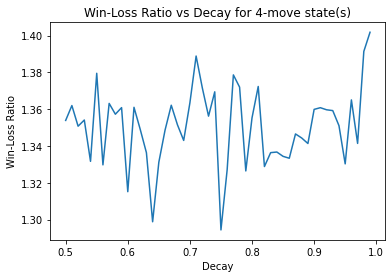

0.99


In [34]:
from matplotlib.pyplot import title


for l in [1,2,3,4]:
    results =[]
    for d in decay:

        ratios = []
    # print(f'Decay: {d}')
        
        for i in batches:
            r = RPSgame(MarkovModel(l, decay=d), initMoves=l,  playerInput=i).start()
            ratios.append(r["ratio"])
        #    print(r)
        
        x = [i*len(j) for (i,j) in zip(ratios, batches)]
    
        results.append(sum(x)/ len(big_string))

    plt.xlabel('Decay')
    plt.ylabel('Win-Loss Ratio')
    plt.title(f'Win-Loss Ratio vs Decay for {l}-move state(s)')
    plt.plot(decay, results)
    plt.show()
    print(decay[results.index(max(results))])

In [7]:
RPSgame(MarkovModel(2, decay=0.77), initMoves=2,  rounds=100).start()

Starting Game
Please enter your choice: R, P, or S
You chose P and I chose P

Tie
Please enter your choice: R, P, or S
You chose P and I chose S

Computer Wins
Please enter your choice: R, P, or S
You chose P and I chose S

Computer Wins
Please enter your choice: R, P, or S
You chose R and I chose S

Player Wins
Please enter your choice: R, P, or S
You chose P and I chose P

Tie
Please enter your choice: R, P, or S
You chose S and I chose P

Player Wins
Please enter your choice: R, P, or S
You chose S and I chose P

Player Wins
Please enter your choice: R, P, or S
You chose R and I chose P

Computer Wins
Please enter your choice: R, P, or S
You chose P and I chose P

Tie
Please enter your choice: R, P, or S
You chose P and I chose R

Player Wins
Please enter your choice: R, P, or S


KeyError: ''